In [2]:
import TSML

import numpy as np
import matplotlib.pyplot as plt

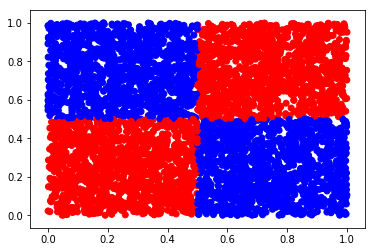

In [3]:
N=5000
X1=np.hstack((np.vstack((0.5*np.random.rand(int(N/4),2),0.5*np.random.rand(int(N/4),2)+.5)),np.zeros((int(N/2),1))))
X2=np.hstack((np.vstack((0.5*np.random.rand(int(N/4),2)+[0.5,0],.5*np.random.rand(int(N/4),2)+[0,.5])),np.ones((int(N/2),1))))

X=np.vstack((X1,X2))

np.random.shuffle(X)

np.random.shuffle(X)
y=X[:,-1:]
X=X[:,:-1]

colors=np.array(["r","b"])
plt.scatter(X[:,0],X[:,1], color=colors[(y.astype(int)).reshape(-1)])

In [4]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

def cost(y,p):
    Err=[]
    zeros=np.where(y==0)
    ones=np.where(y==1)
    Err=np.hstack((-y[ones]*np.log(p[ones]),-(1-y[zeros])*np.log(1-p[zeros])))
    return np.mean(Err)

def ReLU(X):
    return X*(X>0)

def deReLU(Z):
    return Z>0

def dertanh(X):
    return 1-np.power(np.tanh(X),2)

def dersig(X):
    return np.multiply((1/(1+np.exp(-X))),(1-1/(1+np.exp(-X))))

def LeakyReLU(X):
    return X*(X>0)+.2*X*(X<=0)

def deLeakyReLU(Z):
    return (Z>0+.2*(Z<=0))


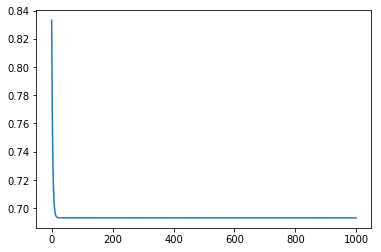

In [5]:
nodes=[3,2]+[1]
activations=[sigmoid]*2+[sigmoid]
act_ders=[dersig]*2
model=TSML.NeuralNet(nodes,X.shape[1],activations,act_ders,cost,task="Classification",scaleweights=True)
model.train(X,y,1000,1e-4)
plt.plot(range(len(model.error)),model.error)

0.692781533645875

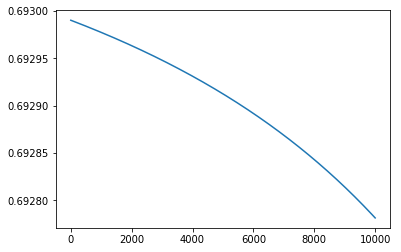

In [9]:
model.train(X,y,10000,1e-5)
plt.plot(range(len(model.error)),model.error)

model.error[-1]


0.5138

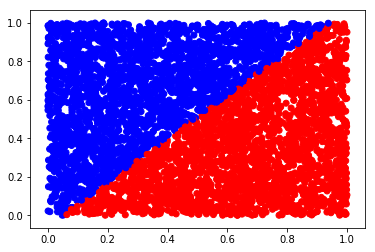

In [10]:
plt.scatter(X[:,0],X[:,1], color=colors[(model.predictions.astype(int)).reshape(-1)])

(model.predictions==y).mean()

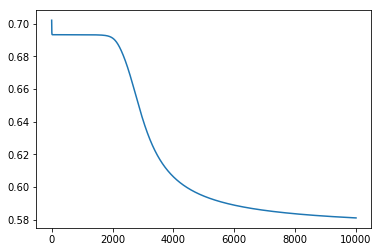

In [11]:
nodes=[1]+[1]
activations=[sigmoid]*(len(nodes)-1)+[sigmoid]
act_ders=[dersig]*(len(nodes)-1)

model2=TSML.NeuralNet(nodes,X.shape[1],activations,act_ders,cost,task="Classification",scaleweights=True)
model2.train(X,y,10000,1e-4)
plt.plot(range(len(model2.error)),model2.error)


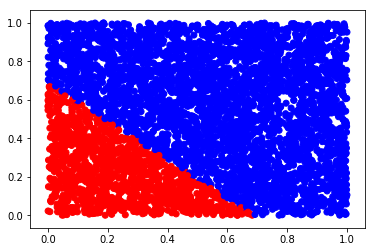

In [12]:
plt.scatter(X[:,0],X[:,1], color=colors[(model2.predictions.astype(int)).reshape(-1)])

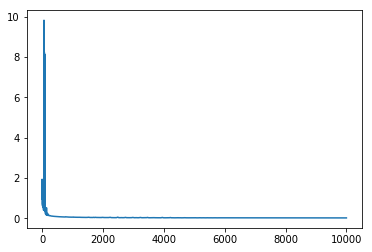

In [13]:
nodes=[100,100]+[1]
activations=[np.tanh]*(len(nodes)-1)+[sigmoid]
act_ders=[dertanh]*(len(nodes)-1)

model3=TSML.NeuralNet(nodes,X.shape[1],activations,act_ders,cost,task="Classification",scaleweights=True)
model3.train(X,y,10000,1e-4)

plt.plot(range(len(model3.error)),model3.error)

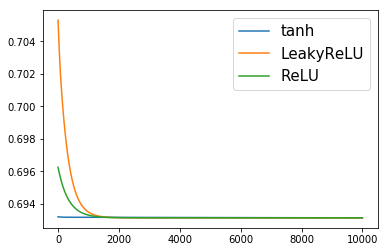

In [14]:
nodes=[10]*10+[1]
activations=[np.tanh]*(len(nodes)-1)+[sigmoid]
act_ders=[dertanh]*(len(nodes)-1)

model6=TSML.NeuralNet(nodes,X.shape[1],activations,act_ders,cost,task="Classification",scaleweights=True, seed=200)
model6.train(X,y,10000,1e-6)

nodes=[10]*10+[1]
activations=[LeakyReLU]*(len(nodes)-1)+[sigmoid]
act_ders=[deLeakyReLU]*(len(nodes)-1)

model7=TSML.NeuralNet(nodes,X.shape[1],activations,act_ders,cost,task="Classification",scaleweights=True)
model7.train(X,y,10000,1e-6)

nodes=[10]*10+[1]
activations=[ReLU]*(len(nodes)-1)+[sigmoid]
act_ders=[deReLU]*(len(nodes)-1)

model8=TSML.NeuralNet(nodes,X.shape[1],activations,act_ders,cost,task="Classification",scaleweights=True)
model8.train(X,y,10000,1e-6)

plt.plot(range(len(model6.error)),model6.error, label="tanh")
plt.plot(range(len(model7.error)),model7.error, label="LeakyReLU")
plt.plot(range(len(model8.error)),model8.error, label="ReLU")
plt.legend(fontsize=15)
